In [2]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Import pandas for Dataframes
import pandas as pd

# Import datetime to filter for specific months
import datetime as dt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
juneResults = session.query(Measurement) \
        .filter(extract("month", Measurement.date) == '6')

print([result.tobs for result in juneResults])

In [8]:
#  3. Convert the June temperatures to a list.
juneTemps = [result.tobs for result in juneResults]

In [10]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
juneTemp_df = pd.DataFrame(juneTemps, columns=['June Temperatures'])
juneTemp_df

,June Temperatures
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [11]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
juneTemp_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
decResults = session.query(Measurement) \
        .filter(extract("month", Measurement.date) == '12')

In [17]:
# 7. Convert the December temperatures to a list.
decTemps = [result.tobs for result in decResults]

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decTemp_df = pd.DataFrame(decTemps, columns=['Dec Temperatures'])
decTemp_df

,Dec Temperatures
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decTemp_df.describe()

,Dec Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


array([[<AxesSubplot:title={'center':'Dec Temperatures'}>]], dtype=object)

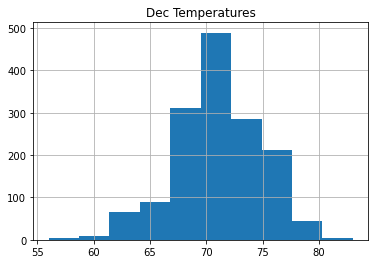

In [23]:
decTemp_df.hist()

array([[<AxesSubplot:title={'center':'June Temperatures'}>]], dtype=object)

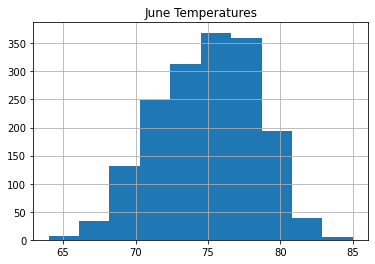

In [24]:
juneTemp_df.hist()

In [27]:
# Look at Precipitation data
junePrecipResults = session.query(Measurement) \
        .filter(extract("month", Measurement.date) == '6')

junePrecip = [result.prcp for result in junePrecipResults]


In [28]:
junePrecip_df = pd.DataFrame(junePrecip, columns=['June Precipitation'])
junePrecip_df

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [29]:
junePrecip_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [31]:
# Look at Precipitation data
decPrecipResults = session.query(Measurement) \
        .filter(extract("month", Measurement.date) == '12')

decPrecip = [result.prcp for result in decPrecipResults]


In [32]:
decPrecip_df = pd.DataFrame(decPrecip, columns=['Dec Precipitation'])
decPrecip_df

,Dec Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [33]:
decPrecip_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
